In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
final_df=pd.read_csv('Final Results\PPCA\Robust Scaler Predictions.csv')

In [ ]:
rmse_1 = np.sqrt(mean_squared_error(final_df['Actual Predictions'], final_df['LSTM_Prediction']))
rmse_2 = np.sqrt(mean_squared_error(final_df['Actual Predictions'], final_df['XGRegressor_Prediction']))
mae_1 = mean_absolute_error(final_df['Actual Predictions'], final_df['LSTM_Prediction'])
mae_2 = mean_absolute_error(final_df['Actual Predictions'], final_df['XGRegressor_Prediction'])
r2_1 = r2_score(final_df['Actual Predictions'], final_df['LSTM_Prediction'])
r2_2 = r2_score(final_df['Actual Predictions'], final_df['XGRegressor_Prediction'])

In [ ]:
# # Define features and target
# X = final_df[['LSTM_Prediction', 'XGRegressor_Prediction']]
# y = final_df['Actual Predictions']

# # Train a linear regression model
# meta_model = LinearRegression()
# meta_model.fit(X, y)

# # Make predictions
# final_df['Combined_Predictions'] = meta_model.predict(X)

# # Evaluate the ensemble
# rmse_combined = np.sqrt(mean_squared_error(y, final_df['Combined_Predictions']))
# mae_combined = mean_absolute_error(y, final_df['Combined_Predictions'])
# r2_combined = r2_score(y, final_df['Combined_Predictions'])

# # Print the results
# print("Adaptive Ensemble Weights:")
# print(f"LSTM Weight: {meta_model.coef_[0]}")
# print(f"XGBoost Weight: {meta_model.coef_[1]}")
# print(f"Intercept: {meta_model.intercept_}")
# print(f"RMSE: {rmse_combined}")
# print(f"MAE: {mae_combined }")
# print(f"R² Score: {r2_combined}")



Adaptive Ensemble Weights:
LSTM Weight: 0.5751916731704733
XGBoost Weight: 0.42633422054838416
Intercept: -1.4815676510959008
RMSE: 25.921704158623562
MAE: 13.197150289354235
R² Score: 0.9206715324242332


In [ ]:
# Calculate weights based on inverse of RMSE
weight_1 = 1 / (1 + rmse_1)
weight_2 = 1 / (25 + rmse_2)

# weight_1=0.5
# weight_2=0.5

# Normalize weights
total_weight = weight_1 + weight_2
weight_1 /= total_weight
weight_2 /= total_weight
rmse_combined = np.sqrt(mean_squared_error(final_df['Actual Predictions'], final_df['Average']))
mae_combined = mean_absolute_error(final_df['Actual Predictions'], final_df['Average'])
r2_combined=r2_score(final_df['Actual Predictions'], final_df['Average'])

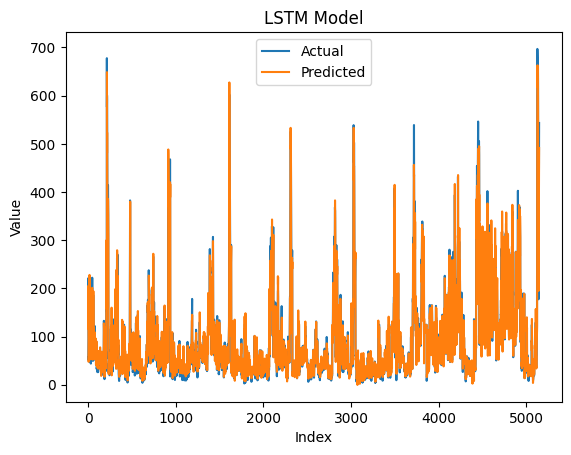

Root Mean Squared Error = 27.177003763751696
Mean Absolute Error = 13.863218785767348
R2 Score = 0.9128022830009743


In [ ]:
plt.plot(final_df['Actual Predictions'], label='Actual')
plt.plot(final_df['LSTM_Prediction'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('LSTM Model')
plt.legend()
plt.show()
print("Root Mean Squared Error = " + str(rmse_1))
print("Mean Absolute Error = " + str(mae_1))
print("R2 Score = " + str(r2_1))

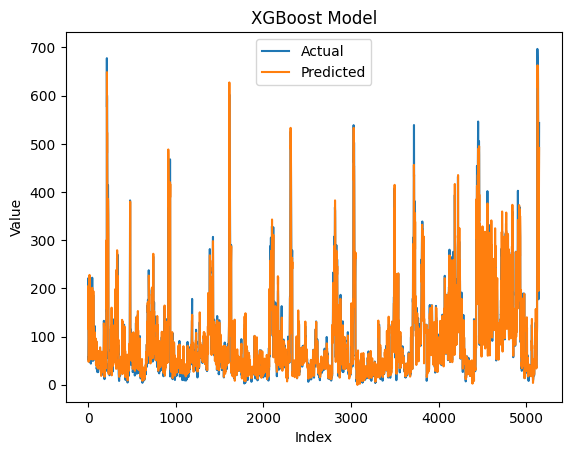

Root Mean Squared Error = 28.24243276814721
Mean Absolute Error = 14.936903020208609
R2 Score = 0.9058313872696127


In [ ]:
plt.plot(final_df['Actual Predictions'], label='Actual')
plt.plot(final_df['LSTM_Prediction'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('XGBoost Model')
plt.legend()
plt.show()
print("Root Mean Squared Error = " + str(rmse_2))
print("Mean Absolute Error = " + str(mae_2))
print("R2 Score = " + str(r2_2))

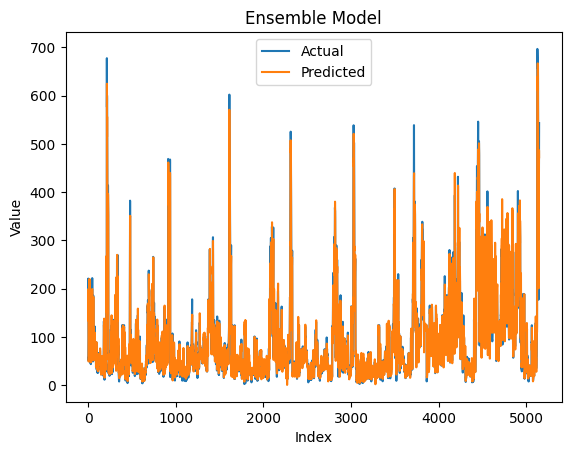

Root Mean Squared Error = 25.921704158623562
Mean Absolute Error = 13.197150289354235
R2 Score = 0.9206715324242332


In [ ]:
plt.plot(final_df['Actual Predictions'], label='Actual')
plt.plot(final_df['Combined_Predictions'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ensemble Model')
plt.legend()
plt.show()
print("Root Mean Squared Error = " + str(rmse_combined))
print("Mean Absolute Error = " + str(mae_combined))
print("R2 Score = " + str(r2_combined))